In [1]:
import pandas as pd
import numpy as np
import os, glob
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm, ticker
from scipy.signal import savgol_filter
import warnings
warnings.filterwarnings('ignore')

def getinfo(place, year):
    df = pd.read_csv('../DataBase/Experiment_period.txt')
    df_ = df[df['region']==place][df['year']==year]
    begintime = pd.to_datetime(df_['begin'].values[0])
    endtime = pd.to_datetime(df_['end'].values[-1])
    # month = str(begintime.month).zfill(2)
    return begintime, endtime

In [49]:
{str(year)[2:4]}

{'22'}

In [52]:
place = 'Keelung'
year = 2022
path = f'/Volumes/home/Research/Detection_snap/{place}/{str(year)[2:3]}?????-{str(year)[2:3]}?????'


savefig = True


if place == 'Taoyuan':
    begintime, endtime = getinfo(place, year)
    sunpath = glob.glob(f'../DataBase/Data_CWA/sunset_time_taoyuan{year}.csv')[0]
    lightpath = f'../DataBase/Temperature/Taoyuan/{str(year)[2:4]}*.xlsx'
    rainpath = glob.glob(f'/Volumes/Data/Rainfall_CWA/467050_新屋/467050_{year}.csv')[0]
    tidepath = glob.glob(f'../DataBase/Data_cwa/{year}_1116_竹圍_tide.csv')[0]
    temp_cwapath = glob.glob(f'../DataBase/Data_CWA/{year}_1116_竹圍_stemp.csv')[0]
    # begintime = datetime(year, 4, 10); endtime = datetime(year, 9, 3)
    # ymin= 0; ymax = 4500 #Taoyuan 04 
    ymin = 0; ymax=6000

elif place == 'Keelung':
    begintime, endtime = getinfo(place, year)
    sunpath = glob.glob(f'../DataBase/Data_CWA/sunset_time_keelung{year}.csv')[0]
    lightpath = f'../DataBase/Temperature/Keelung/{str(year)[2:4]}*.xlsx'
    if year == 2021:
        rainpath = glob.glob(f'/Volumes/Data/Rainfall_CWA/466940_基隆/466940_{year}.csv')[0]
    else:
        rainpath = glob.glob(f'/Volumes/Data/Rainfall_CWA/C0B050_八斗子/C0B050_{year}.csv')[0]
    tidepath = glob.glob(f'../DataBase/Data_CWA/{year}_12191_長潭里_tide.csv')[0]
    temp_cwapath = glob.glob(f'../DataBase/Data_CWA/{year}_12191_長潭里_stemp.csv')[0]
    # begintime = datetime(year, 4, 17, 12); endtime = datetime(year, 5, 3, 12)
    ymin=3000; ymax=17000



print(begintime, endtime)
print(f'sunpath:   {sunpath}')
print(f'lightpath: {lightpath}')
print(f'rainpath:  {rainpath}')
print(f'tidepath:  {tidepath}')
print(f'temppath:  {temp_cwapath}')
dsun = pd.read_csv(sunpath)

2022-04-23 00:00:00 2022-08-23 23:00:00
sunpath:   ../DataBase/Data_CWA/sunset_time_keelung2022.csv
lightpath: ../DataBase/Temperature/Keelung/22*.xlsx
rainpath:  /Volumes/Data/Rainfall_CWA/C0B050_八斗子/C0B050_2022.csv
tidepath:  ../DataBase/Data_CWA/2022_12191_長潭里_tide.csv
temppath:  ../DataBase/Data_CWA/2022_12191_長潭里_stemp.csv


In [108]:
def figure_base_setting(ax):
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax[0].set_xlim(datetime(2021, 4, 1) ,datetime(2021, 10, 1))
    ax[1].set_xlim(datetime(2022, 4, 1) ,datetime(2022, 10, 1))
    ax[2].set_xlim(datetime(2023, 4, 1) ,datetime(2023, 10, 1))

    ax[0].yaxis.set_minor_locator(MultipleLocator(1000))
    ax[0].yaxis.set_major_locator(MultipleLocator(2000))
    ax[1].yaxis.set_minor_locator(MultipleLocator(1000))
    ax[1].yaxis.set_major_locator(MultipleLocator(2000))
    ax[2].yaxis.set_minor_locator(MultipleLocator(1000))
    ax[2].yaxis.set_major_locator(MultipleLocator(2000))
    
    ax[0].yaxis.set_ticks_position('left')
    ax[1].yaxis.set_ticks_position('left')
    ax[2].yaxis.set_ticks_position('left')
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])

    ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    
    ax[0].spines['left'].set_color('red')
    # ax[1].spines['left'].set_color('red')
    # ax[2].spines['left'].set_color('red')
    ax[0].tick_params(axis = 'y', color='red', labelcolor = 'red', which='both')
    ax[1].tick_params(axis = 'y', color='red', labelcolor = 'red', which='both')
    ax[2].tick_params(axis = 'y', color='red', labelcolor = 'red', which='both')
    
def figure_base_setting_right(rax):
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

    rax[0].yaxis.set_minor_locator(MultipleLocator(500))
    rax[0].yaxis.set_major_locator(MultipleLocator(1000))
    rax[1].yaxis.set_minor_locator(MultipleLocator(500))
    rax[1].yaxis.set_major_locator(MultipleLocator(1000))
    rax[2].yaxis.set_minor_locator(MultipleLocator(500))
    rax[2].yaxis.set_major_locator(MultipleLocator(1000))
    
    rax[0].set_yticklabels([])
    rax[1].set_yticklabels([])
    
    # rax[0].spines['right'].set_color('dodgerblue')
    # rax[1].spines['right'].set_color('dodgerblue')
    rax[2].spines['right'].set_color('dodgerblue')
    rax[0].tick_params(axis = 'y', color='dodgerblue', labelcolor = 'dodgerblue', which='both')
    rax[1].tick_params(axis = 'y', color='dodgerblue', labelcolor = 'dodgerblue', which='both')
    rax[2].tick_params(axis = 'y', color='dodgerblue', labelcolor = 'dodgerblue', which='both')


11976.65 10545.0 9066.35
12070.349999999999 10580.0 8456.65
11198.0 9706.0 8422.75
13297.0 10144.0 6877.85
15392.85 13127.0 10961.15
11779.0 10546.5 8847.0
7736.0 5575.0 3911.4
8950.349999999999 6757.5 5188.0
9310.05 7222.0 5890.95
4519.0 3669.0 3033.55
4935.0 3923.0 3216.0
4420.0 3518.0 2888.0
2956.0 2233.0 1724.25
4622.049999999999 3865.0 3281.95
4557.0 3780.0 3150.9
2896.0 2184.5 1624.0
4245.0 3637.0 3100.0
3953.149999999998 3383.0 2697.0
figure setting ... 


Text(0, 0.5, 'Snap rate in Taoyuan (min$^{-1}$)')

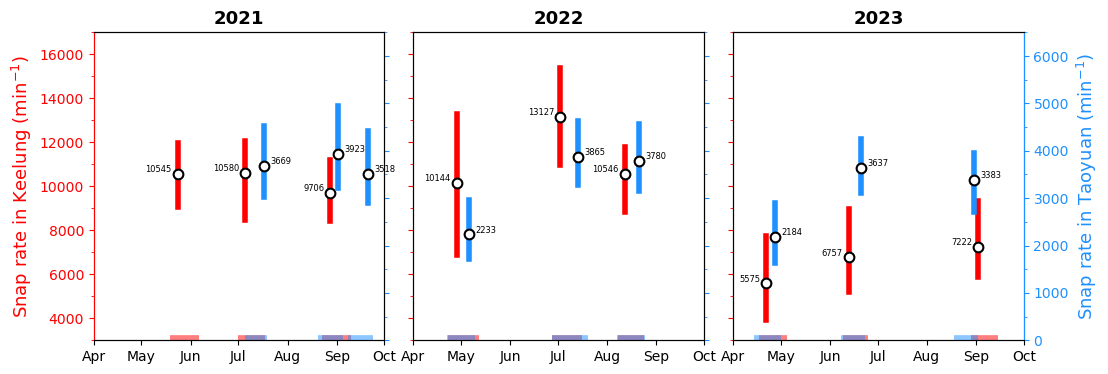

In [113]:
plt.rcParams["font.family"] = "DejaVu Sans"
fig, ax = plt.subplots(1,3,figsize=(12,4))#, sharey=True)
plt.subplots_adjust(wspace = 0.1) 

place = 'Keelung'
for dirpath in sorted(glob.glob(f'/Volumes/home/Research/Detection_snap/{place}/??????-??????')):
    alldf = pd.DataFrame()
    
    if '21' in dirpath:
        year = '2021'
        pidx = 0 
    elif '22' in dirpath:
        year = '2022'
        pidx = 1
    elif '23' in dirpath:
        year = '2023'
        pidx = 2
    ax[pidx].set_title(year, fontsize=13, fontweight='bold')
        
    timerange = dirpath.rsplit('/')[-1]
    begin = timerange.rsplit('-')[0]; end = timerange.rsplit('-')[1]
    begintime = datetime.strptime(begin, "%y%m%d")
    endtime = datetime.strptime(end, "%y%m%d")
    dt = endtime - begintime
    ddt = -4 if place == 'Keelung' else 4    
    plottime = begintime + timedelta(days=dt.days/2+ddt)      
    
    for filepath in sorted(glob.glob(f'{dirpath}/*csv')):
        df = pd.read_csv(filepath)
        alldf = pd.concat([alldf, df])

    Q1 = np.percentile(alldf['Peak'], 95, interpolation='linear')
    Q2 = np.percentile(alldf['Peak'], 50, interpolation='linear')
    Q3 = np.percentile(alldf['Peak'], 5, interpolation='linear')
    
    
    print(Q1, Q2, Q3)
    ax[pidx].hlines(xmin=begintime, xmax=endtime, y=ymin-0.05, lw=7, color='r', alpha=0.5)
    ax[pidx].plot([plottime, plottime], [Q1, Q3], lw=4, color='r')
    ax[pidx].plot([plottime], [Q2], marker = 'o', markersize = 7, color='white', mec='k', mew=1.5)
    if place == 'Keelung':
        ax[pidx].text(plottime + timedelta(days=-4), Q2, int(Q2), ha='right', va ='bottom', fontsize=6)
    
        # gettime = pd.to_datetime(df['Time'].values[0])

place = 'Taoyuan'
rax = [0,0,0]
rax[0] = ax[0].twinx()
rax[1] = ax[1].twinx()
rax[2] = ax[2].twinx()
for dirpath in sorted(glob.glob(f'/Volumes/home/Research/Detection_snap/{place}/??????-??????')):
    alldf = pd.DataFrame()
    
    if '21' in dirpath:
        year = '2021'
        
    elif '22' in dirpath:
        year = '2022'
        
    elif '23' in dirpath:
        year = '2023'
        
        
    timerange = dirpath.rsplit('/')[-1]
    begin = timerange.rsplit('-')[0]; end = timerange.rsplit('-')[1]
    begintime = datetime.strptime(begin, "%y%m%d")
    endtime = datetime.strptime(end, "%y%m%d")
    dt = endtime - begintime
    ddt = -5 if place == 'Keelung' else 5    
    plottime = begintime + timedelta(days=dt.days/2+ddt)      
    
    for filepath in sorted(glob.glob(f'{dirpath}/*csv')):
        df = pd.read_csv(filepath)
        alldf = pd.concat([alldf, df])

    Q1 = np.percentile(alldf['Peak'], 95, interpolation='linear')
    Q2 = np.percentile(alldf['Peak'], 50, interpolation='linear')
    Q3 = np.percentile(alldf['Peak'], 5, interpolation='linear')
    
    
    print(Q1, Q2, Q3)
    if year == '2021':
        rax[0].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color='dodgerblue', alpha=0.5)
        rax[0].plot([plottime, plottime], [Q1, Q3], lw=4, color='dodgerblue')
        rax[0].plot([plottime], [Q2], marker = 'o', markersize = 7, color='white', mec='k', mew=1.5)
        rax[0].text(plottime + timedelta(days=+4), Q2, int(Q2), ha='left', va ='bottom', fontsize=6)
    elif year == '2022':
        rax[1].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color='dodgerblue', alpha=0.5)
        rax[1].plot([plottime, plottime], [Q1, Q3], lw=4, color='dodgerblue')
        rax[1].plot([plottime], [Q2], marker = 'o', markersize = 7, color='white', mec='k', mew=1.5)
        rax[1].text(plottime + timedelta(days=+4), Q2, int(Q2), ha='left', va ='bottom', fontsize=6)    
    elif year == '2023':
        rax[2].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color='dodgerblue', alpha=0.5)
        rax[2].plot([plottime, plottime], [Q1, Q3], lw=4, color='dodgerblue')
        rax[2].plot([plottime], [Q2], marker = 'o', markersize = 7, color='white', mec='k', mew=1.5)
        rax[2].text(plottime + timedelta(days=+4), Q2, int(Q2), ha='left', va ='bottom', fontsize=6)         

print('figure setting ... ')
figure_base_setting(ax)
figure_base_setting_right(rax)

ax[0].set_ylim(ymin-10, ymax)
ax[1].set_ylim(ymin-10, ymax)
ax[2].set_ylim(ymin-10, ymax)
ax[0].set_ylabel('Snap rate in Keelung (min$^{-1}$)', color='red', fontsize=13)
rax[0].spines['left'].set_color('red')


rax[0].set_ylim(0, 6500)
rax[1].set_ylim(0, 6500)
rax[2].set_ylim(0, 6500)
rax[2].set_ylabel('Snap rate in Taoyuan (min$^{-1}$)', color='dodgerblue', fontsize=13)


In [64]:
dirpath

'/Volumes/home/Research/Detection_snap/Keelung'